In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
def show_model(model):
    return 'f(height) = {0} + {1}*height'.format(model[0], model[1])

In [3]:
height=np.array([4.0, 4.5, 5.0, 5.2, 5.4, 5.8, 6.1, 6.2, 6.4, 6.8])
weight=np.array([42, 44, 49, 55, 53, 58, 60, 64, 66, 69])

# Analiticko resenje za odabir koeficijenata 'w'.
# w = inverse(X.transpose()*X)*X.transpose()*Y

# Broj instanci u skupu podataka
N = height.shape[0]

# Matrici X dodajemo kolonu jedinica kao prvu kolonu.
# U stvari, napravili smo matricu jedinica pa smo kolonu na indeksu 1
# zamenili sa vektorom podataka (u nasem slucaju visina).
X = np.ones((N, 2))
X[:, 1] = height
y = weight
print('X.shape: {}'.format(X.shape))
print('y.shape: {}'.format(y.shape))

w = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
print(show_model(w))

X.shape: (10, 2)
y.shape: (10,)
f(height) = -0.47266514806388216 + 10.193621867881543*height


In [4]:
x1 = height[0]
x2 = height[-1]
y1 = w[0] + w[1] * x1
y2 = w[0] + w[1] * x2
print(f'x1 = {x1}\nx2 = {x2}')
print(f'f({x1}) = {y1}\nf({x2}) = {y2}')

x1 = 4.0
x2 = 6.8
f(4.0) = 40.30182232346229
f(6.8) = 68.84396355353061


Text(0.5, 1.0, 'Ilustracija linearne regresije')

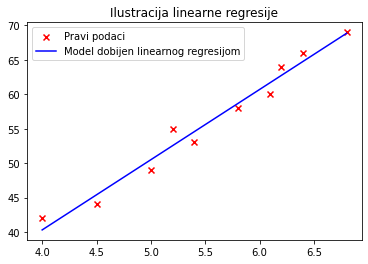

In [7]:
plt.scatter(height, weight, color='red', marker='x')
plt.plot([x1, x2], [y1, y2], color='blue')
plt.legend(['Pravi podaci', 'Model dobijen linearnog regresijom'])
plt.title('Ilustracija linearne regresije')

In [9]:
def show_model(model):
    return 'f(height) = {0} + {1}*height'.format(model.intercept_, model.coef_[0])

height weight
4.0 -> 42
4.5 -> 44
5.0 -> 49
5.2 -> 55
5.4 -> 53
5.8 -> 58
6.1 -> 60
6.2 -> 64
6.4 -> 66
6.8 -> 69
f(height) = -0.4726651480637756 + 10.193621867881548*height


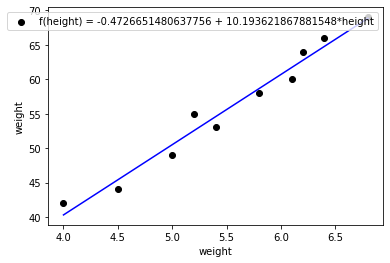

In [11]:
height=[[4.0],[4.5],[5.0],[5.2],[5.4],[5.8],[6.1],[6.2],[6.4],[6.8]]
weight=[42, 44 ,49, 55, 53, 58, 60, 64, 66, 69]

print("height weight")

for row in zip(height, weight):
    print(row[0][0],"->",row[1])

plt.scatter(height,weight,color='black')
plt.xlabel("height")
plt.ylabel("weight")

lin_reg = linear_model.LinearRegression()
lin_reg.fit(height, weight)

# Show trained model
print(show_model(lin_reg))

# Plot the model
predicted_values = [lin_reg.coef_ * i + lin_reg.intercept_ for i in height]
# predicted_values = lin_reg.predict(height)
plt.plot(height, predicted_values, 'b')
plt.xlabel('height')
plt.xlabel('weight')
plt.legend(['Dobijeni model'])
plt.legend([show_model(lin_reg)])

plt.show()

In [13]:
def loss_function(X, y, w):
    """
    Funkcija za podatke X, ciljnu promenljivu y i koeficijente w,
    izracunava vrednost funkcije greske i gradijent.
    """

    # Uzimamo broj instanci (radi citljivijeg koda)
    N = y.shape[0]

    # Pravimo gradijent - parcijalni izvodi po svakom w_i
    gradient = np.zeros(w.shape[0])

    # Izracunavamo vektor u kojem su predikcije
    # onoga sto nas model govori za prosledjene podatke.
    predictions = X.dot(w)

    # Izracunavamo vektor koji predstavlja razliku nasih predikcija
    # u odnosu na prave vrednosti ciljen promenljive.
    diff = predictions - y

    # Izracunavamo gradijent
    gradient = 1/N * (X.transpose().dot(diff))

    # Izracunavamo funkciju greske
    loss = 1/(2*N) * np.sum(diff**2)

    return loss, gradient

In [14]:
def gradient_descent(X, y, w, num_iters, alpha):
    # Pravimo inicijalni vektor za funkciju greske (imace onoliko mesta
    # koliko iteracija ima gradijentni spust).
    loss_history = np.zeros((num_iters, 1))

    for i in range(num_iters):
        # Izracunavamo funkciju greske i gradijente.
        loss, gradient = loss_function(X, y, w)

        # Azuriramo (tehnicki 'biramo nove') koeficijente.
        w = w - alpha * gradient

        # Usput belezimo trenutnu vrednost funkcije greske.
        loss_history[i] = loss

        # Belezimo iteraciju na standardnog izlazu.
        print("Iteration {}/{} Loss = {}".format(i+1, num_iters, loss))

    return w, loss_history

In [15]:
def test_primer_1():
    height = np.array([4, 4.5, 5, 5.2, 5.4, 5.8, 6.1, 6.2, 6.4, 6.8])
    weight = np.array([42, 44, 49, 55, 53, 58, 60, 64, 66, 69])
    N = height.shape[0]
    X = np.ones((N, 2))
    X[:, 1] = height
    y = weight.reshape(-1, 1)
    return X, y

In [16]:
def test_primer_2():
    # Uzimamo 50 (podrazumevano je) uniformno raspodeljenih tacaka
    # iz intervala [1, 10]
    height = np.linspace(1, 10)
    N = height.shape[0]

    # Generise podatke sa prave 3x + 2*eps, gde eps (sum) uzimamo
    # iz normalne raspodele N(0, 1).
    weight = height*3 + 2*np.random.normal(size=(1, N))

    # Dodajemo kolonu jedinica iz tehnickih pogodnosti (prva kolona, tj nulta)
    X = np.ones((N, 2))

    # Dodajemo i podatke
    X[:, 1] = height

    # menjamo shape (N,) u (N, 1)
    y = weight.reshape(-1, 1)
    return X, y

In [17]:
def show_model(w):
    return "f_w(x) = %.2f + height*%.2f" % (w[0][0], w[1][0])

X.shape = (50, 2)
y.shape
Iteration 1/40 Loss = 173.9827139097164
Iteration 2/40 Loss = 67.87530897900838
Iteration 3/40 Loss = 27.207280692303204
Iteration 4/40 Loss = 11.620304444510662
Iteration 5/40 Loss = 5.646182340136307
Iteration 6/40 Loss = 3.3563940924331184
Iteration 7/40 Loss = 2.4787065015257865
Iteration 8/40 Loss = 2.14223721082007
Iteration 9/40 Loss = 2.0132017828168807
Iteration 10/40 Loss = 1.963670135536137
Iteration 11/40 Loss = 1.9446103062807545
Iteration 12/40 Loss = 1.937229737350366
Iteration 13/40 Loss = 1.934325774873108
Iteration 14/40 Loss = 1.9331378454624764
Iteration 15/40 Loss = 1.9326078988380482
Iteration 16/40 Loss = 1.932330413404236
Iteration 17/40 Loss = 1.9321499632539838
Iteration 18/40 Loss = 1.9320069770478228
Iteration 19/40 Loss = 1.9318786217793382
Iteration 20/40 Loss = 1.931756145203919
Iteration 21/40 Loss = 1.931636191836148
Iteration 22/40 Loss = 1.931517474618584
Iteration 23/40 Loss = 1.9313994992670658
Iteration 24/40 Loss = 1.9312

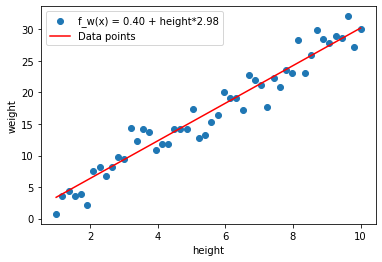

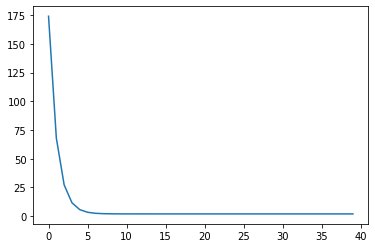

In [18]:
X, y = test_primer_2()

print("X.shape = {}".format(X.shape))
print("y.shape".format(y.shape))

# Broj iteracija koje ce izvrsiti gradijentni spust.
num_iters = 40

# Parametar ucenja - za koliko se pomera gradijentni spust.
alpha = 0.01

# Inicijalni koeficijenti modela.
w = np.zeros((2, 1))

# Pozivamo gradijentni spust koji nam vraca koeficijente w
# kojie predstavljaju koeficijente obucenog modela.
w, loss_history = gradient_descent(X, y, w, num_iters, alpha)
print(show_model(w))

# Izracunavamo predikcije naseg modela, trebace nam za crtanje.
y_predicted = X.dot(w)

plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_predicted, color='red')
plt.xlabel('height')
plt.ylabel('weight')
plt.legend([show_model(w), 'Data points'])
plt.show()

plt.plot(np.arange(num_iters), loss_history)
plt.show()